In [304]:
import numpy as np
import pandas
import sklearn

# import data from csv
dataframe = pandas.read_csv('Scoring.csv',usecols = range(0,19), engine='python')
X = dataframe.values

# Initialize Dictionaries and Lists
players2008 = {}
players2009 = {}
players2010 = {}
players2011 = {}
players_2008 = []
players_2009 = []
players_2010 = []
players_2011 = []

#Find players who have played in 2008-2011 seasons at least half of the season
for i in X:
    if (i[5] == 'C') and (i[4] == 'NHL') and (i[1] == 2008) and (i[6]>40 and i[6] != 'nan'):
        if i[0] in players2008:
            players2008[i[0]] += 1
        else:
            players2008[i[0]] = 1
    if (i[5] == 'C') and (i[4] == 'NHL') and (i[1] == 2009) and (i[6]>40 and i[6] != 'nan'):
        if i[0] in players2009:
            players2009[i[0]] += 1
        else:
            players2009[i[0]] = 1
    if (i[5] == 'C') and (i[4] == 'NHL') and (i[1] == 2010) and (i[6]>40 and i[6] != 'nan'):
        if i[0] in players2010:
            players2010[i[0]] += 1
        else:
            players2010[i[0]] = 1
    if (i[5] == 'C') and (i[4] == 'NHL') and (i[1] == 2011) and (i[6]>40 and i[6] != 'nan'):
        if i[0] in players2011:
            players2011[i[0]] += 1
        else:
            players2011[i[0]] = 1


# Remove players who have multiple team appearances in a season
for i in players2008.keys():
    if players2008[i] > 1:
        del players2008[i]
for i in players2009.keys():
    if players2009[i] > 1:
        del players2009[i]
for i in players2010.keys():
    if players2010[i] > 1:
        del players2010[i]
for i in players2011.keys():
    if players2011[i] > 1:
        del players2011[i]     

#Add players to lists if they have played in all three seasons
for i in X:
    if ((i[0] in players2008) and (i[0] in players2009) and (i[0] in players2010) and (i[0] in players2011)) and (i[6]>41 and i[6] != 'nan'):
        if (i[1] == 2008):
            players_2008.append(i)
        if (i[1] == 2009):
            players_2009.append(i)
        if (i[1] == 2010):
            players_2010.append(i)
        if (i[1] == 2011):
            players_2011.append(i)

In [305]:
# G = 6, A = 4, SOG = 1, PPP =1
# Calculate the total fantasy points scored 2008 (feature data) - normalized to make points per game
X1_2008 = []
X2_2008 = []
X3_2008 = []
X4_2008 = []

for players in players_2008:
    X1_2008.append(players[7]*6/players[6])
    X2_2008.append(players[8]*4/players[6])
    X3_2008.append(players[18]/players[6])
    X4_2008.append((players[12]+players[13])/players[6])

# Calculate target data from 2008 - normalized to make points per game
Y_2008 = []

for players in players_2008:
    Y_2008.append((players[7]*6/players[6])+(players[8]*4/players[6])+(players[18]/players[6])+((players[12]+players[13])/players[6]))

# Calculate the total fantasy points scored 2009 (feature data) - normalized to make points per game
X1_2009 = []
X2_2009 = []
X3_2009 = []
X4_2009 = []

for players in players_2009:
    X1_2009.append(players[7]*6/players[6])
    X2_2009.append(players[8]*4/players[6])
    X3_2009.append(players[18]/players[6])
    X4_2009.append((players[12]+players[13])/players[6])

# Calculate target data from 2009 - normalized to make points per game
Y_2009 = []

for players in players_2009:
    Y_2009.append((players[7]*6/players[6])+(players[8]*4/players[6])+(players[18]/players[6])+((players[12]+players[13])/players[6]))

# Calculate the total fantasy points scored 2010 (feature data) - normalized to make points per game
X1_2010 = []
X2_2010 = []
X3_2010 = []
X4_2010 = []

for players in players_2010:
    X1_2010.append(players[7]*6/players[6])
    X2_2010.append(players[8]*4/players[6])
    X3_2010.append(players[18]/players[6])
    X4_2010.append((players[12]+players[13])/players[6])

# Calculate target data from 2010 - normalized to make points per game
Y_2010 = []

for players in players_2010:
    Y_2010.append((players[7]*6/players[6])+(players[8]*4/players[6])+(players[18]/players[6])+((players[12]+players[13])/players[6]))

# Calculate the total fantasy points scored 2011 (feature data) - normalized to make points per game
X1_2011 = []
X2_2011 = []
X3_2011 = []
X4_2011 = []

for players in players_2011:
    X1_2011.append(players[7]*6/players[6])
    X2_2011.append(players[8]*4/players[6])
    X3_2011.append(players[18]/players[6])
    X4_2011.append((players[12]+players[13])/players[6])

# Calculate target data from 2009 - normalized to make points per game
Y_2011 = []

for players in players_2011:
    Y_2011.append((players[7]*6/players[6])+(players[8]*4/players[6])+(players[18]/players[6])+((players[12]+players[13])/players[6]))




In [306]:
## Linear Regression - Using feature data from 2008 and target data 2009
x_2008 = [X1_2008, X2_2008, X3_2008, X4_2008]
X_2008 = np.column_stack(x_2008+[[1]*len(x_2008[0])])
beta_hat = np.linalg.lstsq(X_2008,Y_2009)[0]
train_predicted_2009 = np.dot(X_2008,beta_hat)

In [330]:
## Calculating the Error for Train

error_train = (abs(train_predicted_2009 - Y_2009)/Y_2009) * 100

total = sum(error_train)/len(error_train)

In [308]:
## Predicting player performances for 2011 season using 2010 data


x_2010 = [X1_2010, X2_2010, X3_2010, X4_2010]
X_2010 = np.column_stack(x_2010+[[1]*len(x_2010[0])])
predicted_2011 = np.dot(X_2010,beta_hat)


In [322]:
## Calculating the Error for Test

# This is the error
error = (abs(predicted_2011 - Y_2011)/Y_2011) * 100

total = sum(error)/len(error)
print total

27.8887548824


15.4518399917
21.2094784826
18.569826211
16.4757129613
13.2109546524
13.2109546524
Total Errors:
15.7442069517
16.9653820321


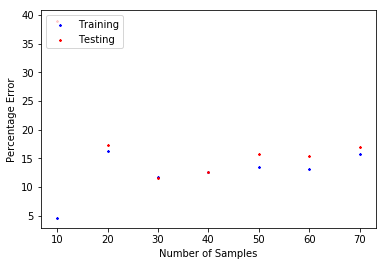

In [323]:
## K-Fold Validation
import math
import matplotlib.pyplot as plt

Training_Error = []
Testing_Error = []

# X_2008 = X_2008[0:10]
# Y_2009 = Y_2009[0:10]

## 1/3 of 74 players
test_size = 24
train_size = 25

train_X_1 = X_2008[0:train_size]
train_X_2 = X_2008[train_size:2*train_size]
test_X = X_2008[len(X_2008)-test_size:len(X_2008)]

train_Y_1 = Y_2009[0:train_size]
train_Y_2 = Y_2009[train_size:2*train_size]
test_Y = Y_2009[len(Y_2009)-test_size:len(Y_2009)]

training_X = []
for i in train_X_1:
    training_X.append(i)
for i in train_X_2:
    training_X.append(i)
    
training_Y = []
for i in train_Y_1:
    training_Y.append(i)
for i in train_Y_2:
    training_Y.append(i)

b_hat = np.linalg.lstsq(training_X,training_Y)[0]
pred_train = np.dot(training_X,b_hat)
pred_test = np.dot(test_X,b_hat)

# Training error
err_train = (abs(pred_train - training_Y)/training_Y) * 100

ttl_train = sum(err_train)/len(err_train)

Training_Error.append(ttl_train)

print ttl_train

# Testing error
err_test = (abs(pred_test - test_Y)/test_Y) * 100

ttl_test = sum(err_test)/len(err_test)

Testing_Error.append(ttl_test)

print ttl_test


######################### 2nd fold
train_X_1 = train_X_2
train_X_2 = test_X
test_X = train_X_1

train_Y_1 = train_Y_2
train_Y_2 = test_Y
test_Y = train_Y_1

training_X = []
for i in train_X_1:
    training_X.append(i)
for i in train_X_2:
    training_X.append(i)

training_Y = []
for i in train_Y_1:
    training_Y.append(i)
for i in train_Y_2:
    training_Y.append(i)


b_hat = np.linalg.lstsq(training_X,training_Y)[0]
pred_train = np.dot(training_X,b_hat)
pred_test = np.dot(test_X,b_hat)

# Training error
err_train = (abs(pred_train - training_Y)/training_Y) * 100

ttl_train = sum(err_train)/len(err_train)

Training_Error.append(ttl_train)
print ttl_train

# Testing error
err_test = (abs(pred_test - test_Y)/test_Y) * 100

ttl_test = sum(err_test)/len(err_test)

Testing_Error.append(ttl_test)
print ttl_test

######################### 3rd fold
train_X_1 = test_X
train_X_2 = train_X_1
test_X = train_X_2

train_Y_1 = test_Y
train_Y_2 = train_Y_1
test_Y = train_Y_2

training_X = []
for i in train_X_1:
    training_X.append(i)
for i in train_X_2:
    training_X.append(i)

training_Y = []
for i in train_Y_1:
    training_Y.append(i)
for i in train_Y_2:
    training_Y.append(i)


b_hat = np.linalg.lstsq(training_X,training_Y)[0]
pred_train = np.dot(training_X,b_hat)
pred_test = np.dot(test_X,b_hat)

# Training error
err_train = (abs(pred_train - training_Y)/training_Y) * 100

ttl_train = sum(err_train)/len(err_train)

Training_Error.append(ttl_train)
print ttl_train

# Testing error
err_test = (abs(pred_test - test_Y)/test_Y) * 100

ttl_test = sum(err_test)/len(err_test)

Testing_Error.append(ttl_test)
print ttl_test

print "Total Errors:"
print sum(Training_Error)/len(Training_Error)
print sum(Testing_Error)/len(Testing_Error)


## Plot Error against Samples (KFold was repeated for different sizes of X_2008)

samples = range(10,74,10)
kfold_training_errors = [4.61, 16.25,11.75,12.66,13.46,13.18,15.74]
kfold_testing_errors = [39.05,17.30,11.62,12.70,15.71,15.36,16.96]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(samples, kfold_training_errors, s=4, c='b', marker="*", label='Training')
ax1.scatter(samples, kfold_testing_errors, s=4, c='r', marker="*", label='Testing')
plt.legend(loc='upper left');
plt.xlabel('Number of Samples')
plt.ylabel('Percentage Error')
plt.show()


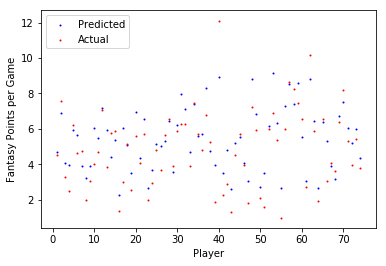

In [324]:
## Plot predicted against actual
import matplotlib.pyplot as plt

x_axis = range(1,len(players_2010)+1)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x_axis, predicted_2011, s=1, c='b', marker="o", label='Predicted')
ax1.scatter(x_axis, Y_2011, s=1, c='r', marker="o", label='Actual')
plt.legend(loc='upper left');
plt.xlabel('Player')
plt.ylabel('Fantasy Points per Game')
plt.show()

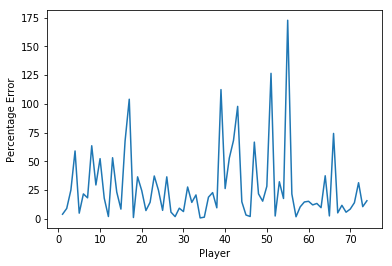

In [325]:
## Graph the percentage error

plt.plot(x_axis, error)
plt.xlabel('Player')
plt.ylabel('Percentage Error')
plt.show()

In [326]:
## Linear regression using avg of past two years

X1_avg1 = [x + y for x, y in zip(X1_2008, X1_2009)]
X1_avg1 = [x / 2 for x in X1_avg1]
X2_avg1 = [x + y for x, y in zip(X2_2008, X2_2009)]
X2_avg1 = [x / 2 for x in X2_avg1]
X3_avg1 = [x + y for x, y in zip(X3_2008, X3_2009)]
X3_avg1 = [x / 2 for x in X3_avg1]
X4_avg1 = [x + y for x, y in zip(X4_2008, X4_2009)]
X4_avg1 = [x / 2 for x in X4_avg1]

# Linear Regression - Using feature data from 2008/2009 and target data 2010
x_avg1 = [X1_avg1, X2_avg1, X3_avg1, X4_avg1]
X_avg1 = np.column_stack(x_avg1+[[1]*len(x_avg1[0])])
beta_hat_avg = np.linalg.lstsq(X_avg1,Y_2010)[0]
train_avg = np.dot(X_2008,beta_hat)

X1_avg2 = [x + y for x, y in zip(X1_2009, X1_2010)]
X1_avg2 = [x / 2 for x in X1_avg2]
X2_avg2 = [x + y for x, y in zip(X2_2009, X2_2010)]
X2_avg2 = [x / 2 for x in X2_avg2]
X3_avg2 = [x + y for x, y in zip(X3_2009, X3_2010)]
X3_avg2 = [x / 2 for x in X3_avg2]
X4_avg2 = [x + y for x, y in zip(X4_2009, X4_2010)]
X4_avg2 = [x / 2 for x in X4_avg2]

x_avg2 = [X1_2010, X2_2010, X3_2010, X4_2010]
X_avg2 = np.column_stack(x_avg2+[[1]*len(x_avg2[0])])
predicted_2011_avg = np.dot(X_avg2,beta_hat_avg)


In [295]:
## Calculating the Error

#This is the train error
error_train_avg = (abs(train_avg - Y_2010)/Y_2010) * 100
total_train_avg = sum(error_train_avg)/len(error_train_avg)
print total_train_avg

# This is the test error
error_avg = (abs(predicted_2011_avg - Y_2011)/Y_2011) * 100
total_test_avg = sum(error_avg)/len(error_avg)
print total_test_avg

20.8587889755
22.9164104455


5.83318532448
60.8615733156
10.1171099346
9.64117664461
6.27076290898e-14
6.27076290898e-14
Total Errors:
5.31676508636
23.5009166534


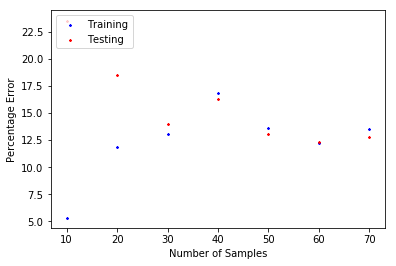

In [303]:
## K-Fold Validation
import math
import matplotlib.pyplot as plt

Training_Error = []
Testing_Error = []

X_avg1 = X_avg1[0:10]
Y_2010 = Y_2010[0:10]

## 1/3 of 74 players
test_size = 4
train_size = 3

train_X_1 = X_avg1[0:train_size]
train_X_2 = X_avg1[train_size:2*train_size]
test_X = X_avg1[len(X_avg1)-test_size:len(X_avg1)]

train_Y_1 = Y_2010[0:train_size]
train_Y_2 = Y_2010[train_size:2*train_size]
test_Y = Y_2010[len(Y_2010)-test_size:len(Y_2010)]

training_X = []
for i in train_X_1:
    training_X.append(i)
for i in train_X_2:
    training_X.append(i)
    
training_Y = []
for i in train_Y_1:
    training_Y.append(i)
for i in train_Y_2:
    training_Y.append(i)

b_hat = np.linalg.lstsq(training_X,training_Y)[0]
pred_train = np.dot(training_X,b_hat)
pred_test = np.dot(test_X,b_hat)

# Training error
err_train = (abs(pred_train - training_Y)/training_Y) * 100

ttl_train = sum(err_train)/len(err_train)

Training_Error.append(ttl_train)

print ttl_train

# Testing error
err_test = (abs(pred_test - test_Y)/test_Y) * 100

ttl_test = sum(err_test)/len(err_test)

Testing_Error.append(ttl_test)

print ttl_test


######################### 2nd fold
train_X_1 = train_X_2
train_X_2 = test_X
test_X = train_X_1

train_Y_1 = train_Y_2
train_Y_2 = test_Y
test_Y = train_Y_1

training_X = []
for i in train_X_1:
    training_X.append(i)
for i in train_X_2:
    training_X.append(i)

training_Y = []
for i in train_Y_1:
    training_Y.append(i)
for i in train_Y_2:
    training_Y.append(i)


b_hat = np.linalg.lstsq(training_X,training_Y)[0]
pred_train = np.dot(training_X,b_hat)
pred_test = np.dot(test_X,b_hat)

# Training error
err_train = (abs(pred_train - training_Y)/training_Y) * 100

ttl_train = sum(err_train)/len(err_train)

Training_Error.append(ttl_train)
print ttl_train

# Testing error
err_test = (abs(pred_test - test_Y)/test_Y) * 100

ttl_test = sum(err_test)/len(err_test)

Testing_Error.append(ttl_test)
print ttl_test

######################### 3rd fold
train_X_1 = test_X
train_X_2 = train_X_1
test_X = train_X_2

train_Y_1 = test_Y
train_Y_2 = train_Y_1
test_Y = train_Y_2

training_X = []
for i in train_X_1:
    training_X.append(i)
for i in train_X_2:
    training_X.append(i)

training_Y = []
for i in train_Y_1:
    training_Y.append(i)
for i in train_Y_2:
    training_Y.append(i)


b_hat = np.linalg.lstsq(training_X,training_Y)[0]
pred_train = np.dot(training_X,b_hat)
pred_test = np.dot(test_X,b_hat)

# Training error
err_train = (abs(pred_train - training_Y)/training_Y) * 100

ttl_train = sum(err_train)/len(err_train)

Training_Error.append(ttl_train)
print ttl_train

# Testing error
err_test = (abs(pred_test - test_Y)/test_Y) * 100

ttl_test = sum(err_test)/len(err_test)

Testing_Error.append(ttl_test)
print ttl_test

print "Total Errors:"
print sum(Training_Error)/len(Training_Error)
print sum(Testing_Error)/len(Testing_Error)


## Plot Error against Samples (KFold was repeated for different sizes of X_2008)

samples = range(10,74,10)
kfold_training_errors = [5.32, 11.84,13.10,16.82,13.61,12.26,13.55]
kfold_testing_errors = [23.50,18.46,13.96,16.26,13.02,12.36,12.75]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(samples, kfold_training_errors, s=4, c='b', marker="*", label='Training')
ax1.scatter(samples, kfold_testing_errors, s=4, c='r', marker="*", label='Testing')
plt.legend(loc='upper left');
plt.xlabel('Number of Samples')
plt.ylabel('Percentage Error')
plt.show()

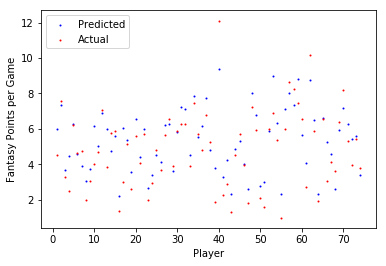

In [230]:
## Plot predicted against actual

x_axis_avg = range(1,len(players_2011)+1)
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.scatter(x_axis_avg, predicted_2011_avg, s=1, c='b', marker="o", label='Predicted')
ax2.scatter(x_axis_avg, Y_2011, s=1, c='r', marker="o", label='Actual')
plt.legend(loc='upper left');
plt.xlabel('Player')
plt.ylabel('Fantasy Points per Game')
plt.show()

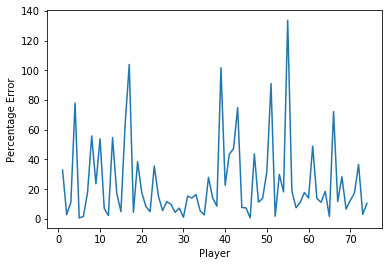

In [231]:
## Graph the percentage error

plt.plot(x_axis_avg, error_avg)
plt.xlabel('Player')
plt.ylabel('Percentage Error')
plt.show()